In [55]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("Nykaa_Product_Review.csv")

In [58]:
df.reset_index(drop=False, inplace=True)

In [70]:
df.tail(40)

,index,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product_Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count
585,585,46a325dbb0f93149e6202e339b9e7e56,BZ1000,nykaa.com,Hair > Shop By Concern > Dry & Frizzy Hair,Max Care,Max Care Virgin Coconut Oil (Cold Pressed),220,https://www.nykaa.com/c/p/832875?skuId=828210,IN,"Maxcare Virgin Coconut Oil (VCO) is pure, unre...",INR,https://images-static.nykaa.com/media/catalog/...,"Max Care Virgin Coconut Oil (Cold Pressed), Na...",100% pure and cold-pressed virgin coconut oilP...,4.6,68.0,0,8
586,586,5357445d70d5722066b00be9b96ad43b,BZ1000,nykaa.com,Brand > Nykaa Naturals,Nykaa Naturals,Nykaa Naturals Citronella Essential Oil,280,https://www.nykaa.com/c/p/348870?skuId=172598,IN,Explore the entire range of Face Oils availabl...,INR,https://images-static.nykaa.com/media/catalog/...,"Nykaa Naturals Citronella Essential Oil, Herba...",NaN,4.2,7483.0,0,231
587,587,8afc639447b07af49d440e3bf690e1c3,BZ1000,nykaa.com,Skin > Moisturizers > Face Moisturizer & Day C...,Charlotte Tilbury,Charlotte Tilbury Charlotte's Magic Cream,5650,https://www.nykaa.com/c/p/985224?skuId=959741,IN,It's science-powered skincare for clinically-p...,INR,https://images-static.nykaa.com/media/catalog/...,Charlotte Tilbury Charlotte's Magic Cream - 30...,"Water, Homosalate , Glyceryl Stearate SE, Ethy...",4,7.0,0,0
588,588,30e44a225f4e6dd2f06749326bc990ff,BZ1000,nykaa.com,Makeup > Lips > Lip Liner,Charlotte Tilbury,Charlotte Tilbury Lip Cheat - Hot Gossip,2200,https://www.nykaa.com/c/p/985209?skuId=959731,IN,Lip liner is the backstage secret weapon! Lip ...,INR,https://images-static.nykaa.com/media/catalog/...,"Charlotte Tilbury Lip Cheat - Hot Gossip,Make ...","Cyclopentasiloxane, Synthetic Wax, Mica, Isodo...",3.9,5.0,179,0
589,589,a5c8769a02e6ef77383563eba531664d,BZ1000,nykaa.com,Skin > Shop By Concern > Skin Dryness,Vaadi Herbals,Vaadi Herbals Pedicure - Manicure Spa Kit Soot...,265,https://www.nykaa.com/c/p/304756?skuId=11269,IN,A divine combination of various herbs and arom...,INR,https://images-static.nykaa.com/media/catalog/...,Vaadi Herbals Pedicure Manicure SPA kit with S...,NaN,4.2,420.0,3484,312
590,590,dd0728751920d389cdcef202bc5b15de,BZ1000,nykaa.com,Skin > Moisturizers > Face Moisturizer & Day C...,Zerb,Zerb Almond Nourishing Cream,299,https://www.nykaa.com/c/p/756039?skuId=261733,IN,Zerb Almond Nourishing Massage Cream moisturiz...,INR,https://images-static.nykaa.com/media/catalog/...,"Zerb Almond Nourishing Cream , Skin, Face, Moi...","Paraffinum Liquidum,Stearic Acid, Cetostearyl...",5,1.0,1516,22
591,591,09d3b448a24a9e097b04ed0f871073a5,BZ1000,nykaa.com,Natural > Aromatherapy > Essential Oils,MESMARA,MESMARA Citronella Essential Oil,349,https://www.nykaa.com/c/p/387925?skuId=387919,IN,Citronella Essential Oil is obtained from the ...,INR,https://images-static.nykaa.com/media/catalog/...,"MESMARA Citronella Essential Oil, Herbal, Arom...",NaN,3,0.0,1051,45
592,592,3f99366382bcdd4ae710875abbbfe291,BZ1000,nykaa.com,Men's Store > Wellness > Sports Nutrition,Big Muscles,Big Muscles Xtreme Muscle Mass - Vanilla,1549,https://www.nykaa.com/c/p/217603?skuId=217601,IN,Big Muscles Xtreme Muscle Mass is an advanced ...,INR,https://images-static.nykaa.com/media/catalog/...,"Big Muscles Xtreme Muscle Mass - Vanilla, Well...","Malt dextrin, Starch, Sucrose, Soy Protein Iso...",NaN,NaN,634,109
593,593,2f35a3b71b61319f44ce520ddb8f15bf,BZ1000,nykaa.com,Natural > Makeup > Lip Balm & Gloss,Vaadi Herbals,Vaadi Herbals Lychee Lip Therapy,48,https://www.nykaa.com/c/p/19762?skuId=11403,IN,PRO-TIP: Clean Lip Gently And Use Your Fingers...,INR,https://images-static.nykaa.com/media/catalog/...,"Vaadi Herbals Lychee Lip Therapy,Herbals,Skinc...",Lychee : Improves Circulation. Adds Health & G...,4.4,612.0,288,0
594,594,38235bada4e5c0ff221960e32499b89c,BZ10

In [60]:
df.shape

(625, 19)

In [61]:
df.columns

Index(['index', 'Product Id', 'Product Brand Code', 'Retailer',
       'Product Category', 'Product Brand', 'Product Name', 'Product Price',
       'Product Url', 'Market', 'Product Description', 'Product Currency',
       'Product Image Url', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Expected Category Count',
       'Expected Brand Count'],
      dtype='object')

In [62]:
df.isnull().sum()

index                        0
Product Id                   0
Product Brand Code           0
Retailer                     0
Product Category            81
Product Brand                0
Product Name                 0
Product Price                0
Product Url                 15
Market                       0
Product Description          0
Product Currency             0
Product Image Url            0
Product Tags                15
Product Contents           301
Product Rating              69
Product Reviews Count       62
Expected Category Count      0
Expected Brand Count         0
dtype: int64

In [69]:
df['Product Brand'].value_counts()

Himalaya           19
Inner Sense        18
Nykaa Cosmetics    17
Lakme              14
Biotique           12
                   ..
Focallure           1
KOCOSTAR            1
Lakme Absolute      1
Shiseido            1
GYMPROT             1
Name: Product Brand, Length: 246, dtype: int64

In [72]:
# Function to replace non-integer prices with 0
def convert_non_integer_prices(price):
    try:
        # Try converting the price to an integer
        return int(price)
    except ValueError:
        # If conversion fails, return 0
        return 0

# Apply the function to the Price column and update the DataFrame
df['Product Price'] = df['Product Price'].apply(convert_non_integer_prices)

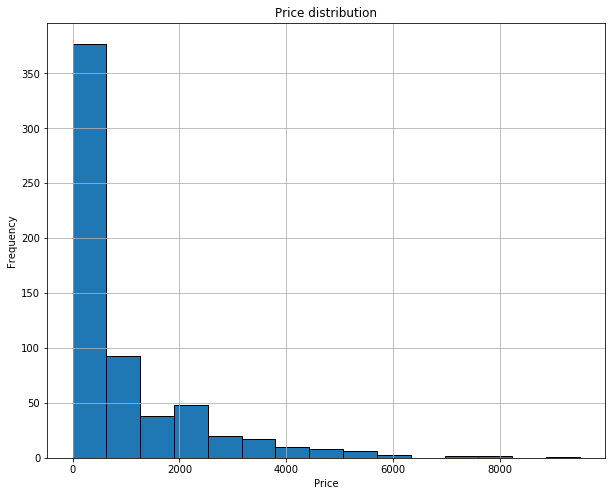

In [80]:
plt.figure(figsize=(10,8))
df['Product Price'].hist(bins=15, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price distribution')

# Show the histogram
plt.show()

In [64]:
df.rename({'Product Name':'Product_Name'} , inplace =True , axis =1)

In [9]:
features = ['Product_Name','Product Description']

In [11]:
def combine_features(row):
    try:
        return row['Product_Name']+" "+row['Product Description']
    except:
        print("Error: ",arow)

In [12]:
for feature in features:
    df[feature] = df[feature].fillna('') #filling all NaNs with blank string

df["combined_features"] = df.apply(combine_features,axis=1)
#applying combined_features() method over each rows of
# dataframe and storing the combined string in "combined_features" column

In [45]:
df["combined_features"].head(2)

0    ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1    L'Oreal Paris Glow Mon Amour Highlighting Drop...
Name: combined_features, dtype: object

In [48]:
df.head(10)

,index,Product Id,Product Brand Code,Retailer,Product Category,Product Brand,Product_Name,Product Price,Product Url,Market,Product Description,Product Currency,Product Image Url,Product Tags,Product Contents,Product Rating,Product Reviews Count,Expected Category Count,Expected Brand Count,combined_features
0,0,b77f3da33be6e65f6183da6ada8c07ca,BZ1000,nykaa.com,Makeup > Face > Contour,ETUDE HOUSE,ETUDE HOUSE Face Color Shading - 02,600,https://www.nykaa.com/c/p/760922?skuId=760920,IN,Etude House Face Color Shading provides a shad...,INR,https://images-static.nykaa.com/media/catalog/...,"ETUDE HOUSE Face Color Shading - 02, Makeup, F...",NaN,4.6,4.0,153,82,ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1,1,f54658c5d511195b6621a640fb743b1b,BH5931,nykaa.com,Brand > L'Oreal Paris,L'Oreal Paris,L'Oreal Paris Glow Mon Amour Highlighting Drop...,454,https://www.nykaa.com/c/p/565974?skuId=565973,IN,It's time to skip the snooze button and get up...,INR,https://images-static.nykaa.com/media/catalog/...,L'Oreal Paris Glow Mon Amour Highlighting Drop...,"G927637, Cyclopentasiloxane, Dimethicone, Isod...",4.3,147.0,431,431,L'Oreal Paris Glow Mon Amour Highlighting Drop...
2,2,cdf6b3387f8976c8e38ad150173dbb6d,BH7276,nykaa.com,Makeup > Face > Foundation,The Body Shop,The Body Shop All-In-One Face Base - 045,1395,https://www.nykaa.com/c/p/31142?skuId=30050,IN,Note: The Body Shop products will be dispatche...,INR,https://images-static.nykaa.com/media/catalog/...,"The Body Shop All-In-One Face Base - 045 , Mak...",NaN,4.4,58.0,0,0,The Body Shop All-In-One Face Base - 045 Note:...
3,3,424755c11c78b2b24ff13c675baf5d19,BZ1000,nykaa.com,Health & Wellness > Good for You > Super Food,True Elements,True Elements Sunflower Raw Seeds,175,https://www.nykaa.com/c/p/370883?skuId=370881,IN,Sunflower has always been admired for its beau...,INR,https://images-static.nykaa.com/media/catalog/...,"True Elements Sunflower Raw Seeds, Wellness, S...",Raw Sunflower Seeds,5,0.0,389,149,True Elements Sunflower Raw Seeds Sunflower ha...
4,4,f7f76573099db0058ef5264c35d9d02e,BZ1000,nykaa.com,Makeup > Lips > Lip Stain,Nykaa Cosmetics,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,539,https://www.nykaa.com/c/p/555315?skuId=555310,IN,It's no secret that a good lippie is a real mo...,INR,https://images-static.nykaa.com/media/catalog/...,NykaaÂ Wonderpuff!Â LipÂ &Â CheekÂ Cushion Lip...,NaN,4,934.0,80,436,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...
5,5,ee007f19f85ce1d73de2aa745ea1bc20,BZ1000,nykaa.com,Natural > Shop By Concern > Acne Treatment,HealthVit,HealthVit Activated Charcoal Powder,249,https://www.nykaa.com/c/p/137267?skuId=137271,IN,Experience the goodness of Pure Activated Char...,INR,https://images-static.nykaa.com/media/catalog/...,"HealthVit Activated Charcoal Powder - 250gm, W...",NaN,4.2,442.0,0,0,HealthVit Activated Charcoal Powder Experience...
6,6,e22a7ea6c594e3e52a4dbe1eb04fd7a3,BH5825,nykaa.com,Brand > Nivea,Nivea,NIVEA Body Lotion Oil in Lotion Rose & Argan O...,260,https://www.nykaa.com/c/p/353370?skuId=353368,IN,Indulge in the goodness of natural oils in a f...,INR,https://images-static.nykaa.com/media/catalog/...,"Nivea Oil In Lotion Rose & Argan Oil, Skin, Bo...","Aqua, Glycerin, Dicaprylyl Ether, Alcohol Dena...",4.5,1220.0,160,160,NIVEA Body Lotion Oil in Lotion Rose & Argan O...
7,7,20532c740b21fcecfeecebc2ad1c5a8d,BZ1000,nykaa.com,Natural > Skin > Face Wash,Lotus Herbals,Lotus Herbals Whiteglow Activated Charcoal Bri...,140,https://www.nykaa.com/c/p/811670?skuId=811668,IN,Lotus Herbals WhiteGlow Activated Charcoal Bri...,INR,https://images-static.nykaa.com/media/catalog/...,Lotus Herbals Whiteglow Activated Charcoal Bri...,Key Ingredients:Activated Charcoal (Coconut Sh...,4.2,8.0,922,274,Lotus Herbals Whiteglow Activated Charcoal Bri...
8,8,1ed2ff0473b80cd83ee7cfb130f8d28d,BZ1000,nykaa.com,Mom & Baby > Maternity Wear > Maternity Bra,Floret,Floret Pack of 2 Full-Coverage Maternity Bras ...,758,https://www.nykaa.com/c/p/296484?skuId=296478,

In [49]:
df.loc[0 ,"combined_features" ]

'ETUDE HOUSE Face Color Shading - 02 Etude House Face Color Shading provides a shading effect for enhancing the natural-looking face contour. The pigment can be applied to cheeks, jawline, nose and even hairline to for a sculpted look. Available in three colors. Key Highlights:The silicone coating powder component smoothly adheres to skin with long-lasting effectBlends effortlessly on the skin and gives a streak-free finishEnhances your facial features and creates an illusion of a sculpted, chiseled faceAbout the Brand: Etude House is a South Korean make up colour cosmetics brand that puts the fun back into your beauty routine with its playful range of skincare items and daily makeup products.Explore the entire range of Contour available on Nykaa. Shop more ETUDE HOUSE products here.You can browse through the complete world of ETUDE HOUSE Contour .Alternatively, you can also find many more products from the ETUDE HOUSE Face Color Shading range.MRP: 600 Country of Origin: Korea (the Rep

In [14]:
cv = CountVectorizer(stop_words = "english")
count_matrix = cv.fit_transform(df["combined_features"]) 

In [15]:
count_matrix.shape

(625, 10182)

In [16]:
bow_df = pd.DataFrame(count_matrix.toarray())

In [51]:
bow_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

In [17]:
# helper functions
def get_title_from_index(index):
    return df[df.index == index]["Product_Name"].values[0]

def get_index_from_title(Product_Name):
    return df[df.Product_Name == Product_Name]['index'].values[0]

In [18]:
get_index_from_title('Ponds Moisturising Cold Cream')

489

In [19]:
get_title_from_index(94)

'Charlotte Tilbury Matte Revolution - Festival Magic'

In [20]:
cosine_sim = cosine_similarity(count_matrix)

In [21]:
cosine_sim.shape

(625, 625)

In [22]:
movie_user_likes =  'Ponds Moisturising Cold Cream'
movie_index = get_index_from_title(movie_user_likes)
movie_index

489

In [23]:
cosine_sim[movie_index]

array([0.22557597, 0.10342747, 0.24704226, 0.12000049, 0.15516389,
       0.15173949, 0.11432461, 0.1979767 , 0.13044332, 0.12860575,
       0.07508181, 0.13020935, 0.11168712, 0.22072143, 0.14104573,
       0.12035969, 0.17872502, 0.0763668 , 0.12150859, 0.16941854,
       0.14078333, 0.12070114, 0.24715577, 0.01726706, 0.08029207,
       0.11065229, 0.17557763, 0.1569016 , 0.14467984, 0.17650452,
       0.12519941, 0.08214401, 0.05337605, 0.35809296, 0.19683432,
       0.04193833, 0.        , 0.10823964, 0.1613428 , 0.06840469,
       0.13580397, 0.11667205, 0.08930529, 0.15537417, 0.18021115,
       0.13802429, 0.23875086, 0.17938785, 0.1468294 , 0.18511006,
       0.10979576, 0.16343011, 0.31471032, 0.04972452, 0.17807482,
       0.12707376, 0.01496459, 0.2179709 , 0.09516908, 0.1225832 ,
       0.33968311, 0.1478106 , 0.15700603, 0.16469484, 0.13117178,
       0.11566   , 0.1194906 , 0.17097655, 0.10567049, 0.13977131,
       0.12125547, 0.        , 0.29116257, 0.19397273, 0.30405

In [24]:
similar_products = list(enumerate(cosine_sim[movie_index]))

In [25]:
similar_products

[(0, 0.22557596503350053),
 (1, 0.1034274710596608),
 (2, 0.24704226199518448),
 (3, 0.12000048979891713),
 (4, 0.1551638898642594),
 (5, 0.15173949382547855),
 (6, 0.11432460682190417),
 (7, 0.19797670072543716),
 (8, 0.13044332114050877),
 (9, 0.12860575493951404),
 (10, 0.07508180782497785),
 (11, 0.1302093471964714),
 (12, 0.11168711865749101),
 (13, 0.2207214278631522),
 (14, 0.1410457344418612),
 (15, 0.12035969077901981),
 (16, 0.17872502241585786),
 (17, 0.07636679521123549),
 (18, 0.12150859411607834),
 (19, 0.16941853689292427),
 (20, 0.14078333427523687),
 (21, 0.12070113739631687),
 (22, 0.2471557663714904),
 (23, 0.017267062892749263),
 (24, 0.08029207188778686),
 (25, 0.1106522883206469),
 (26, 0.17557763475883198),
 (27, 0.1569016009608246),
 (28, 0.14467984325180944),
 (29, 0.17650452162436553),
 (30, 0.12519940553608574),
 (31, 0.0821440096816907),
 (32, 0.05337605126836237),
 (33, 0.3580929568290413),
 (34, 0.19683432375452703),
 (35, 0.04193832599657044),
 (36, 0.0),

In [26]:
similarity = sorted(similar_products,key=lambda x:x[1],
                               reverse=True)[1:]

In [27]:
similarity

[(611, 0.6837408067077061),
 (260, 0.5615169008457147),
 (356, 0.5439959145105187),
 (544, 0.41172647173476973),
 (315, 0.39088206912577833),
 (349, 0.39088206912577833),
 (499, 0.38470007537580225),
 (470, 0.37447161529616174),
 (33, 0.3580929568290413),
 (397, 0.35379613239364743),
 (574, 0.35316595968178166),
 (357, 0.3512391215709682),
 (60, 0.33968311024337877),
 (262, 0.3379973275783616),
 (586, 0.3379973275783616),
 (350, 0.33513212614032784),
 (456, 0.33031915991752525),
 (52, 0.314710324446108),
 (577, 0.31451216458222286),
 (376, 0.3087021182459891),
 (74, 0.30405944943411467),
 (285, 0.30071140721188205),
 (241, 0.29916056127123164),
 (348, 0.29872649174302535),
 (443, 0.29872649174302535),
 (473, 0.2980856241922593),
 (413, 0.29706610679220397),
 (604, 0.29667616210205083),
 (569, 0.29417420270727607),
 (587, 0.2927432580101201),
 (72, 0.29116256803655416),
 (492, 0.288875117393024),
 (243, 0.2873956602370585),
 (453, 0.2853069950072752),
 (202, 0.28495013808837005),
 (550,

In [28]:
i=0
print("Top 10 similar products to "+movie_user_likes+" are:\n")
for element in similarity:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar products to Ponds Moisturising Cold Cream are:

Ponds Light Moisturiser Non-Oily Fresh Feel With Vitamin E + Glycerine
Ponds Super Light Gel Oil Free Moisturiser With Hyaluronic Acid + Vitamin E
Spawake Moisturising Cold Cream
Spawake Whitening Fairness Gel Cream SPF15 PA++
L'Occitane Immortelle Divine Cream
L'Occitane Immortelle Divine Cream
Garnier Wrinkle Lift Anti-Ageing Cream
Forest Essentials Soundarya Radiance Cream With 24K Gold SPF25
NIVEA Soft - Light Moisturising Cream
Goodcare Youth Lift Anti Ageing Cream
Kiehl's Men's Oil Eliminator 24 Hour Anti-Shine Moisturizer


In [31]:
df_final = df[['Product_Name','combined_features']]

In [32]:
df_final.head()

,Product_Name,combined_features
0,ETUDE HOUSE Face Color Shading - 02,ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1,L'Oreal Paris Glow Mon Amour Highlighting Drop...,L'Oreal Paris Glow Mon Amour Highlighting Drop...
2,The Body Shop All-In-One Face Base - 045,The Body Shop All-In-One Face Base - 045 Note:...
3,True Elements Sunflower Raw Seeds,True Elements Sunflower Raw Seeds Sunflower ha...
4,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...


In [33]:
df_final.to_csv("final_product_db.csv")

In [34]:
df_final.append({"Product_Name":"test", "combined_features":"test row added"}, 
                ignore_index=True)

,Product_Name,combined_features
0,ETUDE HOUSE Face Color Shading - 02,ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1,L'Oreal Paris Glow Mon Amour Highlighting Drop...,L'Oreal Paris Glow Mon Amour Highlighting Drop...
2,The Body Shop All-In-One Face Base - 045,The Body Shop All-In-One Face Base - 045 Note:...
3,True Elements Sunflower Raw Seeds,True Elements Sunflower Raw Seeds Sunflower ha...
4,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...
...,...,...
621,BOLLYGLOW Concealer + Corrector Masala - Cocoa,BOLLYGLOW Concealer + Corrector Masala - Cocoa...
622,As-It-Is Nutrition Pure Creatine Monohydrate,As-It-Is Nutrition Pure Creatine Monohydrate A...
623,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...
624,M.A.C Veluxe Pearl Eye Shadow (Pro Palette Ref...,M.A.C Veluxe Pearl Eye Shadow (Pro Palette Ref...


In [35]:
df_final

,Product_Name,combined_features
0,ETUDE HOUSE Face Color Shading - 02,ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1,L'Oreal Paris Glow Mon Amour Highlighting Drop...,L'Oreal Paris Glow Mon Amour Highlighting Drop...
2,The Body Shop All-In-One Face Base - 045,The Body Shop All-In-One Face Base - 045 Note:...
3,True Elements Sunflower Raw Seeds,True Elements Sunflower Raw Seeds Sunflower ha...
4,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...
...,...,...
620,Orly Breathable Treatment + Color Nail Lacquer...,Orly Breathable Treatment + Color Nail Lacquer...
621,BOLLYGLOW Concealer + Corrector Masala - Cocoa,BOLLYGLOW Concealer + Corrector Masala - Cocoa...
622,As-It-Is Nutrition Pure Creatine Monohydrate,As-It-Is Nutrition Pure Creatine Monohydrate A...
623,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...


In [36]:
#REcommendation Code

def recomend_products(user_input, count=10):
    
    def get_title_from_index(df,index):
        return df[df.index == index]["Product_Name"].values[0]
    i = 0
    df = pd.read_csv("final_product_db.csv")
    cv=CountVectorizer()
    product_list=[]
    if user_input == " ":
        return 'Please Enter something'
    else:
        df = df.append({"Product_Name":"external", "combined_features":user_input}, ignore_index=True)
        count_matrix = cv.fit_transform(df["combined_features"])
        cosine_sim = cosine_similarity(count_matrix)
        similar_products = list(enumerate(cosine_sim[625]))
        similarity = sorted(similar_products, key= lambda x:x[1], reverse=True)
        for products in similarity[1:]:
            product_list.append(get_title_from_index(df, products[0]))
            i=i+1
            if i > count:
                break
        return product_list

In [81]:
user ='kajal'

In [82]:
recomend_products(user)

['Swiss Beauty Intense Gel Kajal Eyeliner - Bronze',
 'K-Veda Eyeyurvedic Kohl Liner Trends - Black Shimmer',
 'DIOR Diorshow High Intensity Khol Pencil - 099 Black khol',
 'House Of Makeup Double Duty Kohl + Liner - Silverrighteous',
 'ETUDE HOUSE Face Color Shading - 02',
 "L'Oreal Paris Glow Mon Amour Highlighting Drops - 02 Loving Peach",
 'The Body Shop All-In-One Face Base - 045',
 'True Elements Sunflower Raw Seeds',
 'Nykaa Wonderpuff Cushion Liquid Lipstick - Werk It',
 'HealthVit Activated Charcoal Powder',
 'NIVEA Body Lotion Oil in Lotion Rose & Argan Oil - For Dry Skin']

In [39]:
import pickle

In [40]:
pickle.dump(df_final,open('products.pkl','wb'))

In [42]:
pickle.load(open('products.pkl','rb'))

,Product_Name,combined_features
0,ETUDE HOUSE Face Color Shading - 02,ETUDE HOUSE Face Color Shading - 02 Etude Hous...
1,L'Oreal Paris Glow Mon Amour Highlighting Drop...,L'Oreal Paris Glow Mon Amour Highlighting Drop...
2,The Body Shop All-In-One Face Base - 045,The Body Shop All-In-One Face Base - 045 Note:...
3,True Elements Sunflower Raw Seeds,True Elements Sunflower Raw Seeds Sunflower ha...
4,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...,Nykaa Wonderpuff Cushion Liquid Lipstick - Wer...
...,...,...
620,Orly Breathable Treatment + Color Nail Lacquer...,Orly Breathable Treatment + Color Nail Lacquer...
621,BOLLYGLOW Concealer + Corrector Masala - Cocoa,BOLLYGLOW Concealer + Corrector Masala - Cocoa...
622,As-It-Is Nutrition Pure Creatine Monohydrate,As-It-Is Nutrition Pure Creatine Monohydrate A...
623,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...,L.A. Girl Eye Lux Mesmerizing Eyeshadow - Trop...
